# Project: TMDb Movie Data Analysis 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this data analysis project, I chose the data from '[TMDb Movie](https://www.themoviedb.org/)' . Since I've worked at the movie industry for a while, I often wondered which properties are highly related to the success of a certain movie. Success of a movie can be evaluated in many different ways. The popularity of the movie, or "mostly" the revenue (or sometimes both) of the movie could make can be use as a proxy to measure success. In this analysis, I mainly investigated which properties of movie are associated with the popularity/revenue of the movie. 

In this dataset, 10,866 samples and and several features are collected as follows: 

> - Financial Information (budget(adjusted budget), revenue(adjusted revenue))
> - Evaluation Information (popularity, vote count, vote average)
> - Product Information (original title, cast, director, tagline, keywords, overview, runtime, genres, released date, released year)
> - Others (homepage, production companies)

Based on the provided dataset, I came up with several detailed questions as follows: 

> 1. Which genres are most popular from year to year?
> 2. What kinds of properties are associated with high revenue movies?
> 3. Are the popular genres significantly associated with the movies' revenues?
> 4. How does the annual revenue in movie industry change over the years?
> 5. Does the average popularity increase over the years?

To make this analysis more efficiently, I imported the following packages. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the TMDb Movie data and print out a few lines
original_df= pd.read_csv('tmdb-movies.csv')
original_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check the number of samples / features in each dataset
original_df.shape

(10866, 21)

In [4]:
# Find duplicated rows in each dataset and drop the duplicates
print ('The number of duplicated data:', sum(original_df.duplicated()))
original_df.drop_duplicates(inplace=True) 

The number of duplicated data: 1


In [5]:
# Check the datatypes and missing values of all columns 
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

> First, I've checked general properties of the dataset. The original dataset includes 10,866 samples and 21 features. One of the samples is duplicated, so I dropped it. There are some features including missing values. Some features seem unuseful for the purpose of this analysis. So, I re-examined the features having missing values after filtering out the irrelvant columns. 

In [6]:
# Drop irrelevant columns for this analysis.
movie_df = original_df.copy()
unuseful_col= ['id', 'homepage', 'tagline', 'imdb_id', 'original_title',
               'keywords', 'overview', 'budget', 'revenue', 'production_companies','cast', 'director' ]
movie_df.drop(unuseful_col, axis=1, inplace = True)

In [7]:
np.sort(movie_df.release_year.unique())

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [8]:
len(movie_df.release_year.unique())

56

> I copied the orignal dataframe and drop the irrelevant columns from the copied dataframe, which is called _"movie_df"_. The movie samples are collected in the dataset annually from 1960 to 2015, for 56 years. 

In [9]:
# Turn off scientific notation in pandas 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# After dropping the irrelevant columns, check again the columns 
movie_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,0.65,102.07,217.40,5.98,2001.32,17549894.04,51369001.76
std,1.00,31.38,575.64,0.94,12.81,34307526.66,144638333.13
min,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,0.21,90.00,17.00,5.40,1995.00,0.00,0.00
50%,0.38,99.00,38.00,6.00,2006.00,0.00,0.00
75%,0.71,111.00,146.00,6.60,2011.00,20853251.08,33701729.01
max,32.99,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


> From the describe table, at least 50% of movies having no budget and no revenue. Especially the movies with zero budgets seem very unreliable, without additional information. Thus, those movies are removed from the dataset. 

In [10]:
# Movies without zero budgets are stored to the dataframe: "movie_mod"
movie_mod = movie_df.query('budget_adj > 0')
movie_mod.shape

(5169, 9)

In [11]:
movie_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    5169 non-null   float64
 1   runtime       5169 non-null   int64  
 2   genres        5168 non-null   object 
 3   release_date  5169 non-null   object 
 4   vote_count    5169 non-null   int64  
 5   vote_average  5169 non-null   float64
 6   release_year  5169 non-null   int64  
 7   budget_adj    5169 non-null   float64
 8   revenue_adj   5169 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 403.8+ KB


In [12]:
movie_mod.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5169.00,5169.00,5169.00,5169.00,5169.00,5169.00,5169.00
mean,0.99,107.10,408.65,6.03,2001.25,36889069.20,102195263.38
std,1.33,22.81,788.31,0.88,11.78,41960957.85,195919401.69
min,0.00,0.00,10.00,1.50,1960.00,0.92,0.00
25%,0.35,93.00,35.00,5.50,1996.00,8102293.07,0.00
50%,0.62,103.00,122.00,6.10,2005.00,22715052.32,28631665.83
75%,1.15,117.00,402.00,6.60,2010.00,50083840.35,113419570.98
max,32.99,540.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


> After dropping the irrelevant columns and unreliable datapoints, 9 features and 5,169 unique samples remain in the dataset. 
Only the feature 'genres' has one missing value. I've decided to use 'budget_adj' and 'revenue_adj', instead of 'budget' and 'revenue' thoughout the analysis. Since they are adjusted to inflation issues over the years, we can compare the movies more fairly over the year.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288F0435608>,
      dtype=object)

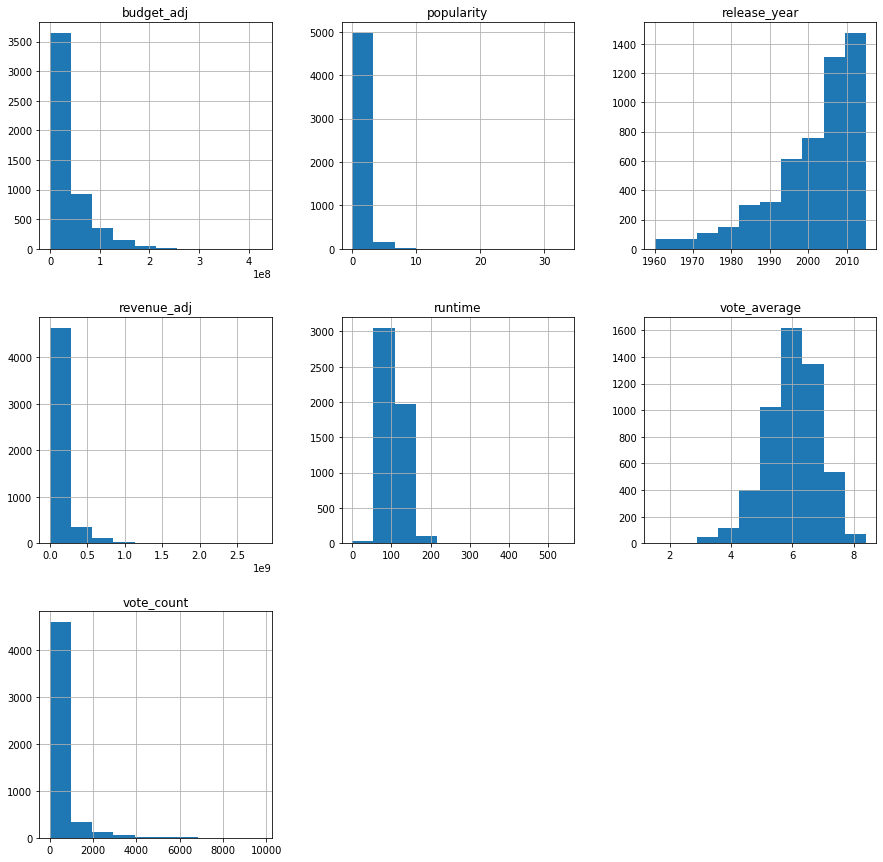

In [13]:
movie_mod.hist( figsize= (15,15))

> - The histogram of 'release_year' shows that the number of movies released in each year has been increased exponentially. This partially explains that the film industry has grown rapidly for the last half a century. 
> - 'vote_average'  is pretty much normally distributed.
> - The running time of most films are between 50 minutes and 150 minutes. 
> - The distributions of the rest features are highly skewed to the right. From the descriptive statistic information and the histograms, we can also expect the features have several outliers. When I checked the original title of the outliers, they are apparently world-wide famous movies, such as _'Jurassic World', 'Inception', 'The Avengers'_ and so on. It is obvious that such extraordinarily successful movies could achieve high value in some properties such as 'popularity'. Thus, I decided not to exclude the outliers from this analysis. 

### Data Cleaning

#### 1. Removing dulipated information

> The two columns: 'release_date' and 'release_year' contain the same information. 
Thus, I dropped the column : 'release_date', because 'release_year' has cleaner data. 

In [14]:
movie_mod.drop(['release_date'], axis=1, inplace = True);

C:\Users\wonso\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
movie_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    5169 non-null   float64
 1   runtime       5169 non-null   int64  
 2   genres        5168 non-null   object 
 3   vote_count    5169 non-null   int64  
 4   vote_average  5169 non-null   float64
 5   release_year  5169 non-null   int64  
 6   budget_adj    5169 non-null   float64
 7   revenue_adj   5169 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 363.4+ KB


#### 2. Dealing with missing values 

> As you can see from _movie_mod_ information table, the column 'genres' has one missing value. First, I found out the datapoint containing the missing value of genres. Then using its index number, I searched other information about the sample from the previous dataframe:  "original_df". It turns out that the sample is called _"The Party at Kitty and Stud's"_, and its IMDb ID is "tt0065904". Based on the information, I found out the missing value from the website: [IMDb_tt0065904](https://www.imdb.com/title/tt0065904/). Finally, I filled up the missing value in the dataframe. Filling up the missing values was possible in this case, since there are very small number of missing values in the dataset. If many values are omitted, this method is not practical to be applied. 

In [16]:
null_data = movie_mod[movie_mod.isnull().any(axis=1)]
null_data # Find the sample whose 'genres' column is omitted

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
10659,0.34,71,NaN,10,3.00,1970,28081.84,0.00


In [17]:
original_df.iloc[10658, :] # Find the whole information about the datapoint

id                                                                   4255
imdb_id                                                         tt0065904
popularity                                                           0.34
budget                                                               5000
revenue                                                                 0
original_title                              The Party at Kitty and Stud's
cast                    Sylvester Stallone|Henrietta Holm|Nicholas War...
homepage                                                              NaN
director                                                     Morton Lewis
tagline                                                               NaN
keywords                male nudity|female nudity|group sex|erection|p...
overview                Kitty and Stud are lovers. They enjoy a robust...
runtime                                                                71
genres                                

In [18]:
values = {'genres': 'Adult|Comedy|Drama'} 
movie_mod.fillna(value=values, inplace = True); # Fill up the missing datapoint

C:\Users\wonso\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
movie_mod.info() # All columns contain non-missing values. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    5169 non-null   float64
 1   runtime       5169 non-null   int64  
 2   genres        5169 non-null   object 
 3   vote_count    5169 non-null   int64  
 4   vote_average  5169 non-null   float64
 5   release_year  5169 non-null   int64  
 6   budget_adj    5169 non-null   float64
 7   revenue_adj   5169 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 363.4+ KB


> After all, I ended up with  8 features and 5,169 samples. All features do not contain missing values. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  Which genres are most popular from year to year?

>- Only for this research question, I created a new dataframe called "genre_df" with relevant columns for the convenience of analysis. 
>- Most movies simultaneously belong to several genres. Thus, I split the column ('genres') with the delimiter '|', and convert the  categorical variable into indicator variables.
>- Also, the popularity of a single movie represents the popularity of the **"combined"** genres. Therefore, I think the popularity score of a certain movie is not appropriate to be used as the popularity of individual genre. Instead, I decided to use the number of each genre released in each year, as the proxy of the genre popularity in that year. 
>- First, I analyse the most popular year of each genre (i.e. which year is the most popular year for each genre?).
>- Second, I investigate the most popular genre fpr each year (i.e. which genre was the most popular since 1970?)  

In [20]:
# Create a new dataframe for this section only 
genre_df=movie_mod[['release_year', 'genres']]
genre_df.head(5)

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller
1,2015,Action|Adventure|Science Fiction|Thriller
2,2015,Adventure|Science Fiction|Thriller
3,2015,Action|Adventure|Science Fiction|Fantasy
4,2015,Action|Crime|Thriller


In [21]:
# Convert the categorical variable into indicator variables
genre_df=genre_df.set_index(['release_year'])['genres'].str.get_dummies('|').reset_index()
genre_df.head() # Check whether the converting is well-performed.

,release_year,Action,Adult,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2015,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2015,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2015,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2015,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
genre_df.groupby('release_year').sum().idxmax()  # The most popular year for each genre

Action             2011
Adult              1970
Adventure          2008
Animation          2013
Comedy             2009
Crime              2013
Documentary        2011
Drama              2011
Family             2006
Fantasy            2008
Foreign            2008
History            2009
Horror             2012
Music              2015
Mystery            2009
Romance            2007
Science Fiction    2009
TV Movie           2006
Thriller           2011
War                2008
Western            2004
dtype: int64

In [23]:
genre_year= genre_df.groupby('release_year').sum().idxmax(axis = 1) # The most popular(released) genre in each year
genre_year.value_counts() # The most popular genre over the years

Drama        42
Comedy        9
Adventure     2
Action        1
Thriller      1
Horror        1
dtype: int64

### Research Question 2: What kinds of properties are associated with high revenue movies?

> For the second research question, I investigate how several properties associated with "high" revenue movies.  
>- As mentioned earlier, the adjusted revenue is used for the fair comparison. Then I defined 'High Revenue' group as the movies which achieved positive (adjusted) revenues. On the other hand, 'Low Revenue' group is defined as the movies with zero revenues. 
>- In this section, I visualized the association with high revenue movies through scatter plots using Matplotlib and compared the strength of the relationships using correlations.  

In [24]:
# The low_revenue subset is consisted of the movies with zero revenues.
low_revenue = movie_mod.query('revenue_adj < 0.001')  
# The high_revenue subset is consisted of the movies with positive adjusted revenues.
high_revenue = movie_mod.query('revenue_adj > 0')

In [25]:
print("The number of movies belongs to the low revenue subset : ", len(low_revenue) ) 
print("The number of movies belongs to the high revenue subset : ", len(high_revenue) ) 

The number of movies belongs to the low revenue subset :  1315
The number of movies belongs to the high revenue subset :  3854


Text(0.5, 1.0, 'Scatter plot Revenue (adj) & Budget (adj)')

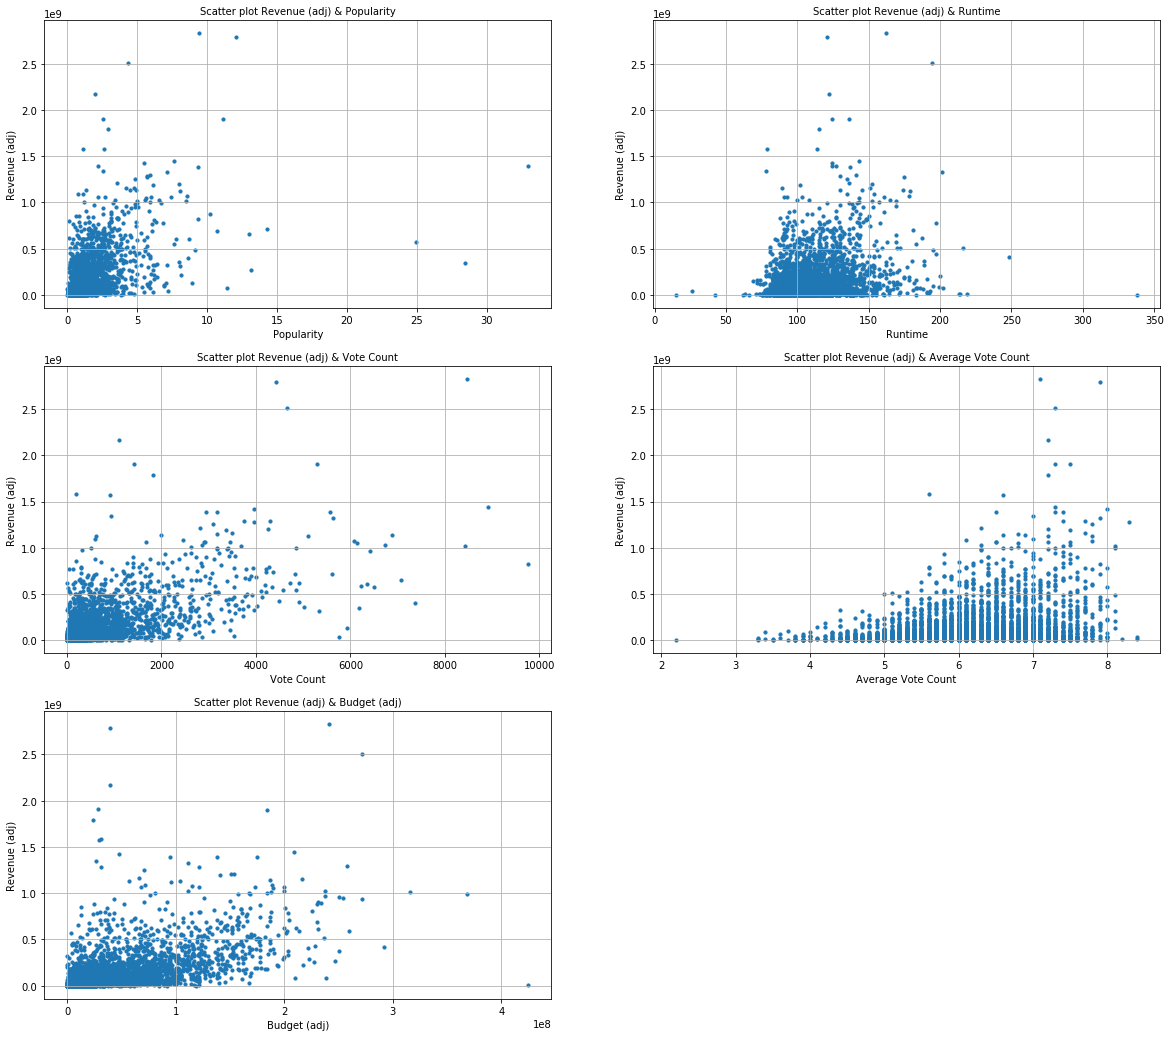

In [26]:
y=high_revenue['revenue_adj']
x_pop = high_revenue['popularity']
x_rt = high_revenue['runtime']
x_vc = high_revenue['vote_count']
x_va = high_revenue['vote_average']
x_bd = high_revenue['budget_adj']

plt.figure(figsize=[20, 18])


plt.subplot(321)
plt.grid(True)
plt.scatter(x_pop, y, s=10)
plt.xlabel('Popularity',  fontsize =10)
plt.ylabel('Revenue (adj)', fontsize =10)
plt.title('Scatter plot Revenue (adj) & Popularity', fontsize =10)

plt.subplot(322)
plt.grid(True)
plt.scatter(x_rt, y, s=10)
plt.xlabel('Runtime',  fontsize =10)
plt.ylabel('Revenue (adj)', fontsize =10)
plt.title('Scatter plot Revenue (adj) & Runtime', fontsize =10)

plt.subplot(323)
plt.grid(True)
plt.scatter(x_vc, y, s=10)
plt.xlabel('Vote Count',  fontsize =10)
plt.ylabel('Revenue (adj)', fontsize =10)
plt.title('Scatter plot Revenue (adj) & Vote Count', fontsize =10)


plt.subplot(324)
plt.grid(True)
plt.scatter(x_va, y, s=10)
plt.xlabel('Average Vote Count',  fontsize =10)
plt.ylabel('Revenue (adj)', fontsize =10)
plt.title('Scatter plot Revenue (adj) & Average Vote Count', fontsize =10)


plt.subplot(325)
plt.grid(True)
plt.scatter(x_bd, y, s=10)
plt.xlabel('Budget (adj)',  fontsize =10)
plt.ylabel('Revenue (adj)', fontsize =10)
plt.title('Scatter plot Revenue (adj) & Budget (adj)', fontsize =10)

In [27]:
high_revenue[['popularity', 'runtime','vote_count', 'vote_average','budget_adj']].corrwith(high_revenue['revenue_adj'])

popularity     0.55
runtime        0.28
vote_count     0.65
vote_average   0.27
budget_adj     0.57
dtype: float64

> **Findings:** The scatter plots visualize the relationships between the adjusted revenue with other properties. According to the correlation coefficients, all properties basically show positive relationships with the level of revenues. Additionally, I want to point out the fact that a majority of movies which could make high revenues, have less than 200 miuntes of runtime. The movies with longer than 200 minutes runtime, could not make noticeable revenues.  

### Research Question 3: Are the popular genres of movies significantly associated with the movies' revenues?

> From the first research question, I found out that the genres: Drama and Comedy are the genres mostly released over the year. In this section, I compared the average revenue between complementary groups: one group with the movies that include a certain genre and the other doesn't. For example, I divide the whole samples into one group with the movies that belong to the genre: "Drama", and the other group with the movies whose genres do not include "Drama". 
- Among all 21 genres, I conducted the comparisons for the most popular five genres. 
- Then, using two samples independent t-test, I concluded whether the average revenues of the two groups are significantly different at a significance level 0.05. 

In [28]:
sum(movie_mod.revenue_adj.duplicated())

1320

In [29]:
# As before, I converted the categorical variable "genres" into indicator variables. 
# However, this time, I set the feature 'revenue_adj' as the index, since we will compare the revenue between two sub-groups. 
genres_df=movie_mod.set_index([ 'revenue_adj'])['genres'].str.get_dummies('|').reset_index()
genres_df.head()

,revenue_adj,Action,Adult,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1392445892.52,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,348161292.49,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,271619025.41,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1902723129.80,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1385748801.47,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
genres_df.shape

(5169, 22)

In [31]:
genres_df.sum().sort_values(ascending=False) # Number of movies in each genres

revenue_adj       528247316427.92
Drama                     2317.00
Comedy                    1741.00
Thriller                  1641.00
Action                    1428.00
Adventure                  906.00
Romance                    861.00
Crime                      823.00
Horror                     765.00
Science Fiction            701.00
Family                     523.00
Fantasy                    508.00
Mystery                    440.00
Animation                  260.00
History                    183.00
Music                      169.00
War                        155.00
Western                     74.00
Documentary                 64.00
Foreign                     35.00
TV Movie                     9.00
Adult                        1.00
dtype: float64

> By summing up the number of samples for eacn column, the genres: 'Drama', 'Comedy', 'Thriller', 'Action', 'Adventure' are the most popular (i.e. mostly released) five categories where the movies belong to.

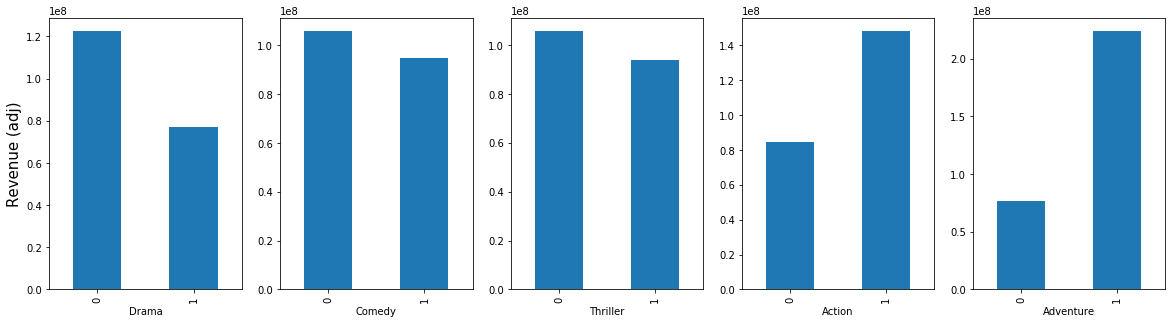

In [32]:
# Plot the mean differences 

plt.figure(figsize=[20,5])

plt.subplot(151)
genres_df_Drama = genres_df.groupby('Drama')['revenue_adj'].mean() 
genres_df_Drama.plot.bar()
plt.ylabel('Revenue (adj)', fontsize= 15)

plt.subplot(152)
test_df_Comedy = genres_df.groupby('Comedy')['revenue_adj'].mean() 
test_df_Comedy.plot.bar()

plt.subplot(153)
test_df_Thriller = genres_df.groupby('Thriller')['revenue_adj'].mean() 
test_df_Thriller.plot.bar()

plt.subplot(154)
test_df_Action = genres_df.groupby('Action')['revenue_adj'].mean() 
test_df_Action.plot.bar()

plt.subplot(155)
test_df_Romance = genres_df.groupby('Adventure')['revenue_adj'].mean() 
test_df_Romance.plot.bar()

> **Findings:** It was quiet interesting findings for me. Drama and Comedy was the two genres that the mostly released since 1970. However, when we compare the average revenue of movies which belongs to the genres, with that of the movies that do not belong to the genres, Drama and Comedy movies do not seem actually lucrative. Thriller movies seem to be in the same situation.
> On the other hand, movies that belong to the genres: Action or Adventure seem to make higher revenue than movies that do not belong to the categories. 
> To check out whether the mean differences are significant, I performed two samples independent t-tests for each genre. 

In [33]:
# Import the package for t-test
from scipy import stats

In [34]:
# T-test result for the Drama genre
drama = genres_df[['revenue_adj','Drama']].query('Drama ==1')
no_drama = genres_df[['revenue_adj','Drama']].query('Drama ==0')
print (stats.ttest_ind(drama.revenue_adj, no_drama.revenue_adj, equal_var = False))

Ttest_indResult(statistic=-8.765116406910666, pvalue=2.5126722188154673e-18)


In [35]:
# T-test result for the Comedy genre
comedy = genres_df[['revenue_adj','Comedy']].query('Comedy ==1')
no_comedy = genres_df[['revenue_adj','Comedy']].query('Comedy ==0')
print (stats.ttest_ind(comedy.revenue_adj, no_comedy.revenue_adj, equal_var = False))

Ttest_indResult(statistic=-2.2086143396962368, pvalue=0.027250242894697223)


In [36]:
# T-test result for the Thriller genre
thriller = genres_df[['revenue_adj','Thriller']].query('Thriller ==1')
no_thriller = genres_df[['revenue_adj','Thriller']].query('Thriller ==0')
print (stats.ttest_ind(thriller.revenue_adj, no_thriller.revenue_adj, equal_var = False))

Ttest_indResult(statistic=-2.1144470992916733, pvalue=0.03454776508792962)


In [37]:
# T-test result for the Action genre
action = genres_df[['revenue_adj','Action']].query('Action ==1')
no_action = genres_df[['revenue_adj','Action']].query('Action ==0')
print (stats.ttest_ind(action.revenue_adj, no_action.revenue_adj, equal_var = False))

Ttest_indResult(statistic=8.910425081087276, pvalue=1.147643032604205e-18)


In [38]:
# T-test result for the Romance genre
romance = genres_df[['revenue_adj','Adventure']].query('Adventure ==1')
no_romance = genres_df[['revenue_adj','Adventure']].query('Adventure ==0')
print (stats.ttest_ind(romance.revenue_adj, no_romance.revenue_adj, equal_var = False))

Ttest_indResult(statistic=13.476314674543284, pvalue=4.224720314031549e-38)


> The returns of T-tests are statistic(calculated t-statistic) and pvalue(two-tailed p-value). The pvalue for one-tailed test is the half of the pvalue for two-tailed p-value. Since the p-values for two-tailed test are all smaller than the significant level 0.05, we can interpret the test results as follows: 
- The average revenue between "Drama and Non-Drama"/ "Comedy and Non-Comedy"/ "Thriller and Non-Thriller"/ "Action and Non-Action"/ "Adventure and Non-Adventure" movies is statistically different at a significant level 0.05.

### Research Question 4:  How does the annual revenue in moive industry change over the years?

> In this part, I analysed the overall trend of the average annual revenue using moving averages. Comparing to 5-, 15-years of moving averages, 10-year moving averages (denoted as 'MA(10)') is chosen since the MA(10) trendline is smooth enough to capture the trend, but it still includes enough information from the original data.

In [39]:
mean_rev= movie_mod.groupby('release_year', as_index= False )['revenue_adj'].mean()
mean_rev['revenue_adj_MA10'] = mean_rev.iloc[:,1].rolling(window =10).mean()

Text(0, 0.5, 'Adjusted Revenue MA(10)')

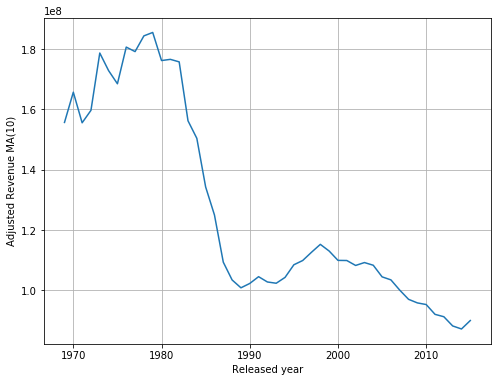

In [40]:
plt.figure(figsize=[8,6])
plt.grid(True)
x = mean_rev['release_year']
plt.plot(x, mean_rev['revenue_adj_MA10'])
plt.xlabel('Released year',  fontsize =10)
plt.ylabel('Adjusted Revenue MA(10)', fontsize =10)

> **Findings:** According to the MA(10) line plot, the average revenue of the movies increased until the year 1980, the the revenue decrease dramatically for the next decade. Since special effects (expensive digital effects) are introduced and up-front salaries of name-recognition stars (and their agents) is inflated in 1980s, these could be the reasons of decreasing the film's gross revenue. After 1990, the revenue appears to increaes again, but the increase could not reach the peak point like in early 1980s. From 2000, the revenue continues reduction trend. [Reference: Film History of 1980s](https://www.filmsite.org/80sintro.html)

### Research Question 5: Does the average popularity increase over the year?

> Finally, I briefly investigate how the average popularity of the movies look like over the years. I also analyse the trend of popularity using 10-year moving averages. 

In [41]:
mean_pop= movie_mod.groupby('release_year', as_index= False )['popularity'].mean()
mean_pop['popularity_MA10'] = mean_pop.iloc[:,1].rolling(window =10).mean()

Text(0, 0.5, 'Popularity MA(10)')

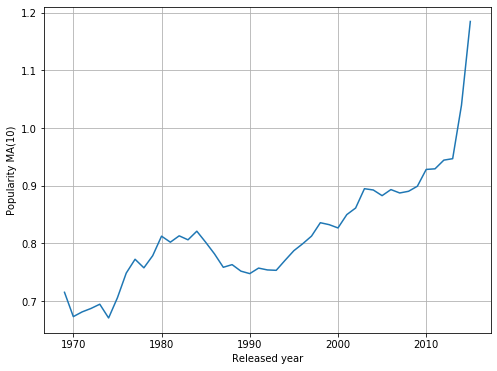

In [42]:
plt.figure(figsize=[8,6])
plt.grid(True)
x = mean_pop['release_year']
plt.plot(x, mean_pop['popularity_MA10'])
plt.xlabel('Released year',  fontsize =10)
plt.ylabel('Popularity MA(10)', fontsize =10)

> **Findings:** Unlike the trendline of revenue, the popularity trendline goes up over the years.

<a id='conclusions'></a>
## Conclusions


> So far, we have investigated the movie dataset collected from 1970 to 2015. For the comparable analysis over the years, adjusted budgets and adjusted revenues are taken. Movies with zero budgets are practically unreliable, so they are dropped at the beginning of the investigation. 
> - Among the 20 different genres, the heyday of each genre is all different. For example, the genre music dominates in 2015, and Adult genre dominated in 1970. Drama was the steadily best-loved genre over the years. Also, there are several years that comedy genre was more popluar than drama. 
> - The properties: popularity, running time, vote and budget of movies are positively related with the high revenue of movies. 
> - The average revenue of the movies which belong to the two genres: Drama or Comedy is significantly less than the revenue from non-Drama or non-Comedy movies, at a significant level 0.05. 
> - While the number of movies released in each year is growing fast and the movies enjoy the rise in its popularity over the years, the average revenue of movies released in individual year is gradually decreasing since 1980. 
> - One limitation of this analysis is the comparisons between genres. A majority of movies are consisted of the mixture of several genres. Since genres are not completely independent, it is difficult to measure the average popularity / revenue of each single genre and compare one another. Also, there might be able to exist the combination effects. For example, drama is the most popluar genre from year to year because drama can easily combined with other genres, such as action-drama, thriller-drama, comedy-drama and so on. 